## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import folium
from folium import plugins
plt.rcParams["figure.figsize"] = [16, 12]

In [2]:
# Membaca dataset yang akan digunakan menggunakan pandas
df = pd.read_csv('/SIB_HACKTIVE8/H8_3/PYTN_Assign_1_KS-010_ArifMunandar/london_crime_by_lsoa.csv')

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [4]:
# Melihat apakah didalam dataset tersebut ada yang nan atau tidak
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [6]:
# Melihat statistik deskripsi
df.describe(exclude = 'O').transpose()

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [7]:
# Melihat informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Line Plot
---
**Line Plot** adalah jenis plot yang menampilkan informasi sebagai rangkaian titik data yang disebut `markers` yang dihubungkan oleh segmen garis lurus.

**Question :** Bagaimana tren jumlah kejahatan/kriminal di wilayah metropolitan London tahun 2008 - 2016

In [8]:
total_crime = df.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
total_crime = total_crime.groupby("year").sum()
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


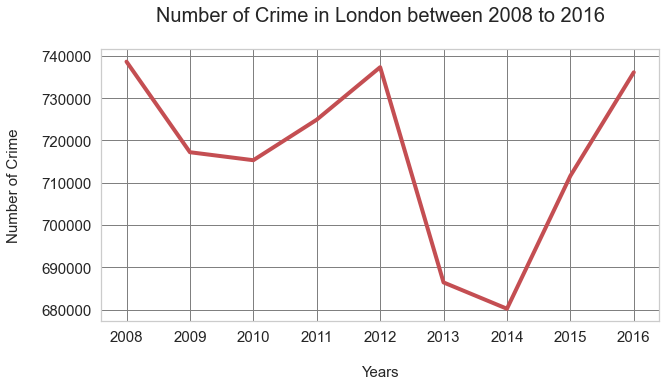

In [9]:
total_crime.plot(
    figsize=(10,5), 
    legend=False, 
    linewidth=4, 
    color="r")
plt.title("Number of Crime in London between 2008 to 2016\n", fontsize=20)
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Berdasarkan grafik diatas, diketahui bahwa pada tahun 2008 merupakan puncak angka kriminal tertinggi di wilayah metropolitan London, dan pada tahun 2014 mencapai angka terendah. Dapat diketahui juga bahwa angka kejahatan mengalami penurunan di tahun 2009 - 2010, kemudian naik sampai tahun 2012, selanjutnya turun secara signifikan sampai tahun 2014 dan diikuti kenaikan tahun 2015 - 2016.

---

**Question** Bagaimana tren jumlah kejahatan di wilayah **`Greenwich`** pada tahun 2008 - 2016 ?

In [9]:
print(df["borough"].unique())

['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


In [10]:
# Melihat tren jumlah kejahatan di wilayah Greenwich
borough_crime = df.drop(["major_category","minor_category","month","lsoa_code"],axis=1)
gwich_crime = borough_crime.set_index("borough")
gwich_crime = gwich_crime.loc['Greenwich'].groupby("year").sum()
gwich_crime

,value
year,
2008,22010
2009,19851
2010,18626
2011,18552
2012,20028
2013,18948
2014,19894
2015,20929
2016,22730


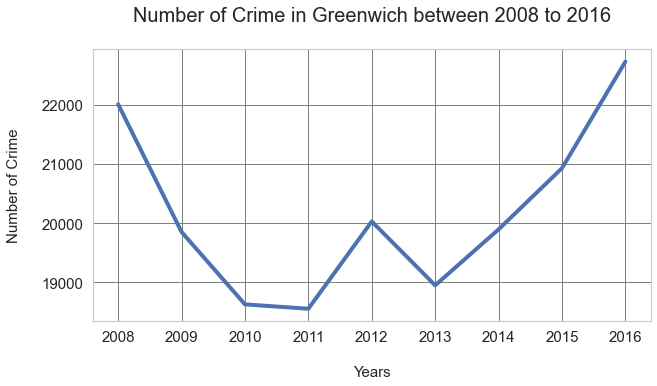

In [16]:
gwich_crime.plot(figsize=(10,5), legend=False, linewidth=4, color="b")
plt.title("Number of Crime in Greenwich between 2008 to 2016\n", fontsize=20)
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Berdasarkan line plot diatas, diketahui bahwa di Greenwich angka kejahatan pada tahun 2008 - 2011 terjadi penurunan dan diikuti dengan peningkatan pada tahun 2016 merupakan puncak kejahatan tertinggi di Greenwich.

---
**Question:** Bagaimana tren jumlah kejahatan berdasarkan Major Category **`Theft and Handling`** pada tahun 2008 - 2016

In [10]:
print(df["major_category"].unique())

['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [14]:
major_crime = df.drop(["borough","minor_category","month","lsoa_code"],axis=1)
major_crime = major_crime.set_index("major_category")
TH_crime = major_crime.loc["Theft and Handling"].groupby("year").sum()
TH_crime

,value
year,
2008,283692
2009,279492
2010,290924
2011,309292
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


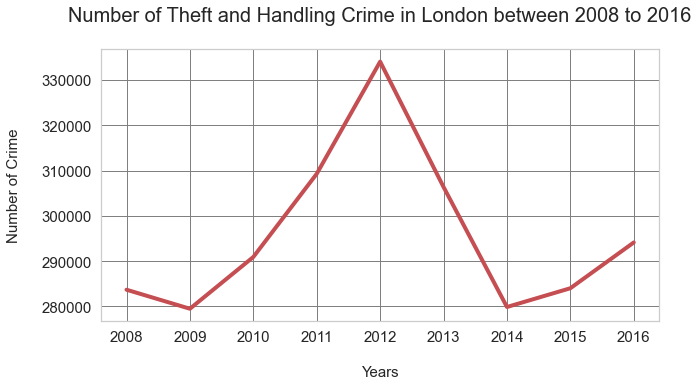

In [15]:

TH_crime.plot(figsize=(10,5), legend=False, linewidth=4, color="r")
plt.title("Number of Theft and Handling Crime in London between 2008 to 2016\n", fontsize=20)
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Berdasarkan line plot diatas, diketahui bahwa kategori theft and handling mencapai puncak tertinggi pada tahun 2012 dan mencapai angka terendah pada tahun 2009 dan 2014.

In [16]:
major_crime = df.drop(["borough","minor_category","month","lsoa_code"],axis=1)
major_crime = major_crime.set_index("major_category")
robbery_crime = major_crime.loc["Robbery"].groupby("year").sum()
burglary_crime = major_crime.loc["Burglary"].groupby("year").sum()
violance_crime = major_crime.loc["Violence Against the Person"].groupby("year").sum()
theft_crime = major_crime.loc["Theft and Handling"].groupby("year").sum()
criminal_crime = major_crime.loc["Criminal Damage"].groupby("year").sum()
drugs_crime = major_crime.loc["Drugs"].groupby("year").sum()
fraud_crime = major_crime.loc["Fraud or Forgery"].groupby("year").sum()
sexual_crime = major_crime.loc["Sexual Offences"].groupby("year").sum()
other_crime = major_crime.loc["Other Notifiable Offences"].groupby("year").sum()

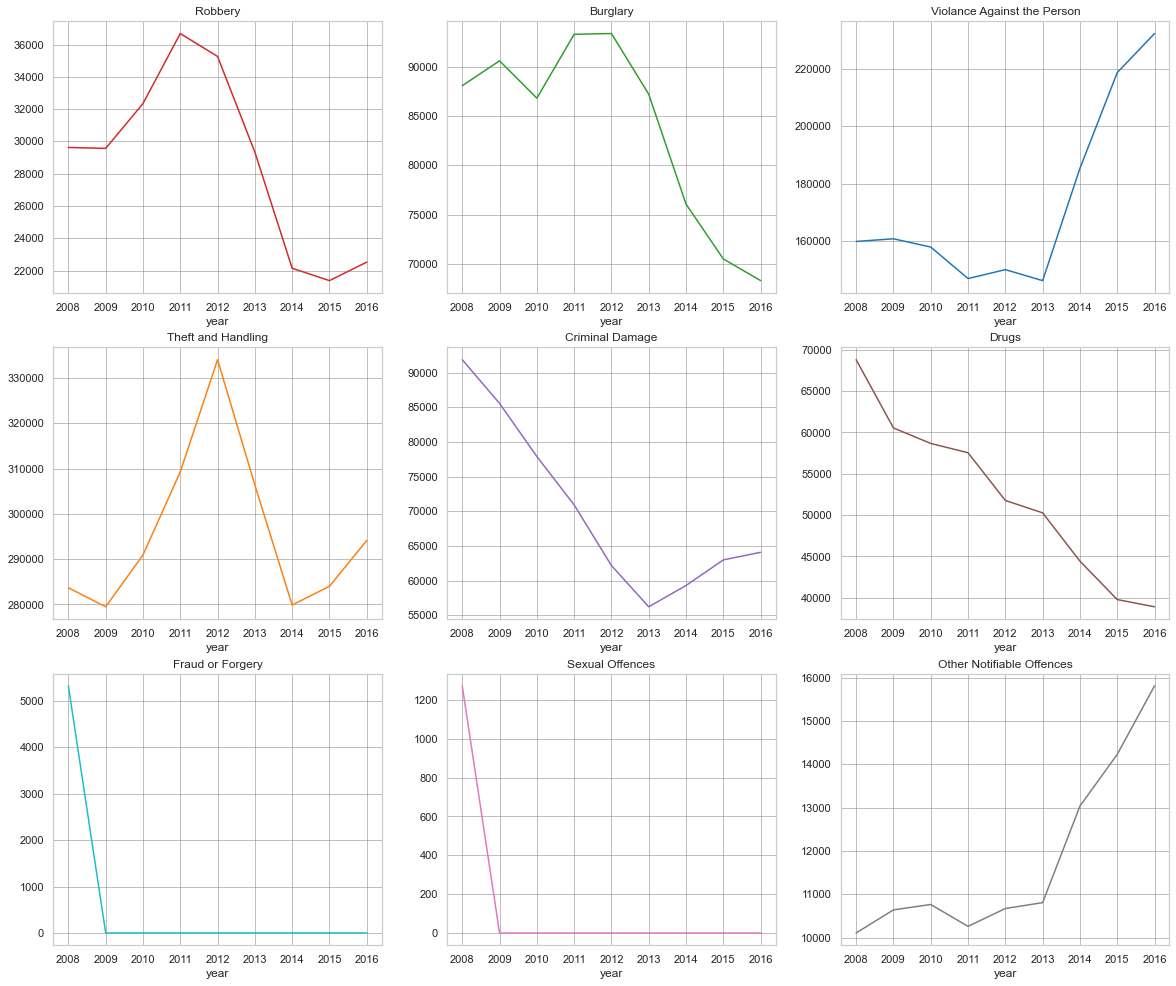

In [19]:
fig = plt.figure(figsize=(20,17))

ax0 = fig.add_subplot(3,3,1) #1
ax1 = fig.add_subplot(3,3,2) #2
ax2 = fig.add_subplot(3,3,3) #3
ax3 = fig.add_subplot(3,3,4) #4
ax4 = fig.add_subplot(3,3,5) #5
ax5 = fig.add_subplot(3,3,6) #6
ax6 = fig.add_subplot(3,3,7) #7
ax7 = fig.add_subplot(3,3,8) #7
ax8 = fig.add_subplot(3,3,9) #7

robbery_crime.plot(kind="line", ax=ax0, legend=False, color="tab:red")
ax0.set_title("Robbery")
ax0.grid(color="grey", linewidth=0.5)

burglary_crime.plot(kind="line", ax=ax1,legend=False, color="tab:green")
ax1.set_title("Burglary")
ax1.grid(color="grey", linewidth=0.5)

violance_crime.plot(kind="line", ax=ax2, legend=False, color="tab:blue")
ax2.set_title("Violance Against the Person")
ax2.grid(color="grey", linewidth=0.5)

theft_crime.plot(kind="line", ax=ax3, legend=False, color="tab:orange")
ax3.set_title("\nTheft and Handling")
ax3.grid(color="grey", linewidth=0.5)

criminal_crime.plot(kind="line", ax=ax4, legend=False, color="tab:purple")
ax4.set_title("Criminal Damage")
ax4.grid(color="grey", linewidth=0.5)

drugs_crime.plot(kind="line", ax=ax5, legend=False, color="tab:brown")
ax5.set_title("Drugs")
ax5.grid(color="grey", linewidth=0.5)

fraud_crime.plot(kind="line", ax=ax6, legend=False, color="tab:cyan")
ax6.set_title("Fraud or Forgery")
ax6.grid(color="grey", linewidth=0.5)

sexual_crime.plot(kind="line", ax=ax7, legend=False, color="tab:pink")
ax7.set_title("Sexual Offences")
ax7.grid(color="grey", linewidth=0.5)

other_crime.plot(kind="line", ax=ax8, legend=False, color="tab:gray")
ax8.set_title("Other Notifiable Offences")
ax8.grid(color="grey", linewidth=0.5)

Berdasarkan plot diatas diketahui bahwa masing-masing kejahatan kategori major memiliki pola tren yang berbeda dan mencapai angka tertinggi dan terendah di tahun yang berbeda-beda.

---
**Question:** Bagaimana tren jumlah kejahatan berdasarkan kategori minor **`Common Assault`** di tahun 2008 - 2016

In [20]:
print(df["minor_category"].unique())

['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'
 'Handling Stolen Goods' 'Criminal Damage To Dwelling'
 'Burglary in a Dwelling' 'Criminal Damage To Motor Vehicle'
 'Other Criminal Damage' 'Counted per Victim' 'Going Equipped'
 'Other Fraud & Forgery' 'Assault with Injury' 'Drug Trafficking'
 'Other Drugs' 'Business Property' 'Other Notifiable' 'Other Sexual'
 'Theft From Motor Vehicle' 'Rape' 'Murder']


In [25]:
minor_crime = df.drop(["lsoa_code","borough","major_category","month"], axis=1)
minor_crime = minor_crime.set_index("minor_category")
CA_crime = minor_crime.loc["Common Assault"].groupby("year").sum()
CA_crime

,value
year,
2008,37356
2009,39671
2010,41591
2011,40502
2012,39246
2013,37882
2014,51244
2015,61758
2016,64440


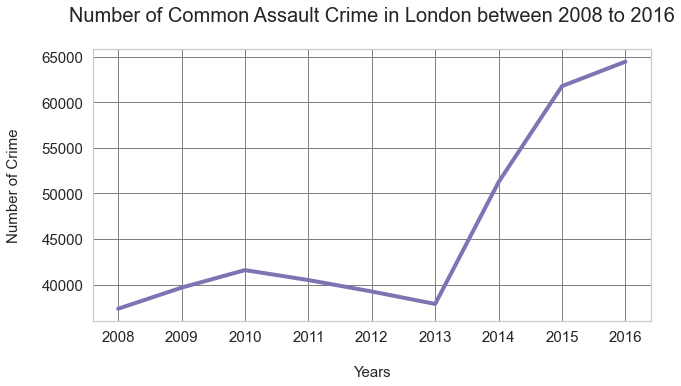

In [26]:
CA_crime.plot(figsize=(10,5), legend=False, linewidth=4, color="m")
plt.title("Number of Common Assault Crime in London between 2008 to 2016\n", fontsize=20)
plt.xlabel("\nYears", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Berdasarkan line plot di atas, diketahui bahwa kejahatan jenis Common Assault mencapai angka tertinggi di tahun 2016.